# Clustering & Eval

Which clustering solution, including number of clusters & algorithm used, is best for the marathon data.

Once an acceptable solution is found, write a data story, including visualizations, where you teach the reader something about the marathon based on the clusters.

In [1]:
# Import modules.
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

# Clustering module imports.
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from itertools import cycle

# Aesthetics.
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# Load dataset.
raw_data = pd.read_csv('~/src/data/unit4/boston-results-2013.csv')

# Rename to df.
df = raw_data
print(df.shape)
print(df.columns)
df.head()

(16164, 21)
Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k',
       'genderdiv', '20k', '35k', 'city', '40k'],
      dtype='object')


,25k,age,name,division,10k,gender,half,official,bib,ctz,...,overall,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,...,9,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,...,5,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,...,1,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,...,5,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,...,3,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


# EDA

In [3]:
df.dtypes

25k           object
age            int64
name          object
division       int64
10k           object
gender        object
half          object
official     float64
bib           object
ctz           object
country       object
overall        int64
pace         float64
state         object
30k           object
5k            object
genderdiv      int64
20k           object
35k           object
city          object
40k           object
dtype: object

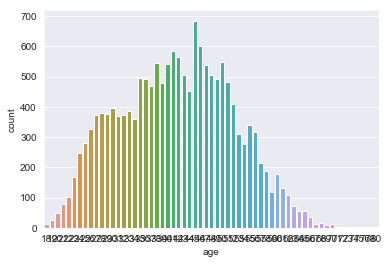

c:\users\mewing_user\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


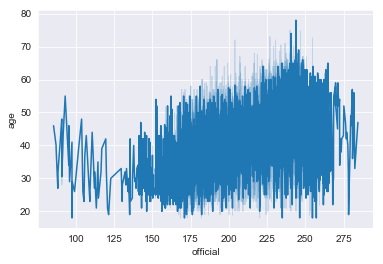

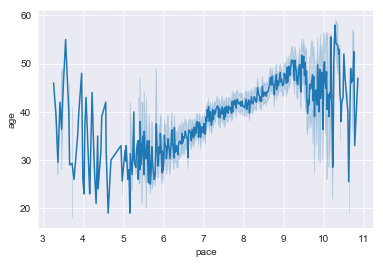

In [4]:
# Age.
g = sns.countplot('age', data=df)
plt.show()

# Age & Official.
g = sns.lineplot(x='official', y='age', data=df)
plt.show()

# Age & Pace.
g = sns.lineplot(x='pace', y='age', data=df)
plt.show()

In [5]:
df.describe()

,age,division,official,overall,pace,genderdiv
count,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000,16164.000000
mean,41.638332,1100.967025,208.159470,8429.373422,7.947398,4351.684732
std,10.351311,942.114816,23.743608,5052.024116,0.905739,2772.398239
min,18.000000,1.000000,85.530000,1.000000,3.270000,1.000000
25%,34.000000,363.000000,191.727500,4061.750000,7.320000,2032.750000
50%,42.000000,842.000000,209.225000,8247.500000,7.980000,4113.500000
75%,49.000000,1560.000000,225.230000,12662.250000,8.600000,6316.000000
max,80.000000,3834.000000,284.230000,17598.000000,10.850000,10648.000000


## Set target to "official", the feature for marathon running time

In [6]:
# Select numeric data & create sep dataframe.
numeric_df = df.select_dtypes(include=['int64', 'float64'])
print(numeric_df.shape)
print(numeric_df.columns)
numeric_df.head()

(16164, 6)
Index(['age', 'division', 'official', 'overall', 'pace', 'genderdiv'], dtype='object')


,age,division,official,overall,pace,genderdiv
0,28,9,90.90,9,3.47,9
1,30,5,132.50,5,5.07,5
2,23,1,130.37,1,4.98,1
3,32,5,88.43,5,3.38,5
4,39,3,87.22,3,3.33,3


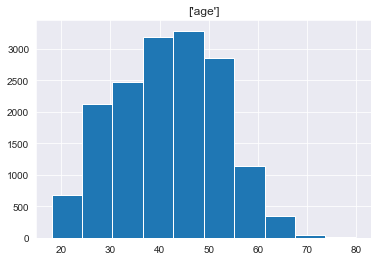

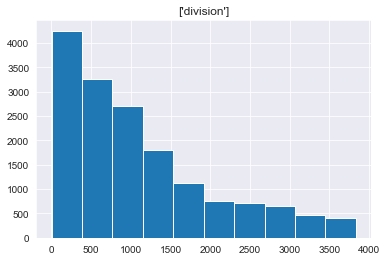

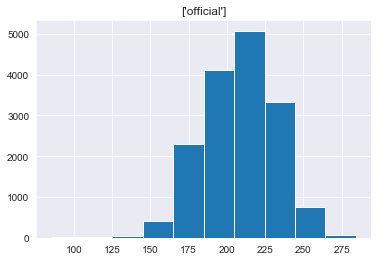

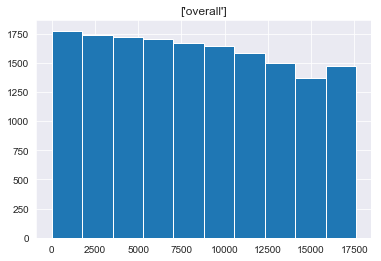

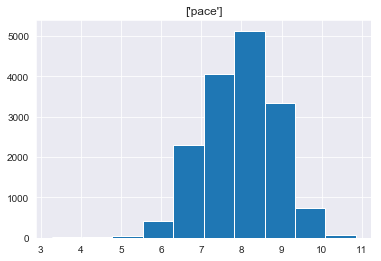

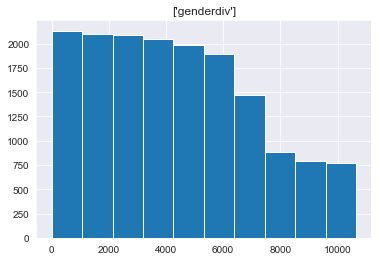

In [7]:
# Check data for Gaussian distributions.
def plotHist(df):
    for col in df.columns:
        plt.hist(df[col], data=df)
        plt.title([col])
        plt.show()
        
plotHist(numeric_df)

In [8]:
# Rename again.
model_df = numeric_df

# Break into a set of features and variable for knwon outcome: "overall".
X = model_df.loc[:, list(model_df.columns[0:3]) + list(model_df.columns[4:])]
Y = model_df['overall']

In [9]:
# Normalize the data.
from sklearn.preprocessing import normalize
X_norm = normalize(X)

In [10]:
# Choose number of clusters.
num_clust = 2

In [11]:
# Create the 2 feature PCA.
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_norm)

In [12]:
# Split the data into 4 equally sized samples. First we break in half:
X_half1, X_half2, X_pcahalf1, X_pcahalf2 = train_test_split(
    X_norm,
    X_pca,
    test_size=0.5,
    random_state=42)

# Then we halve the halves.
X1, X2, X_pca1, X_pca2 = train_test_split(
    X_half1,
    X_pcahalf1,
    test_size=0.5,
    random_state=42)
X3, X4, X_pca3, X_pca4 = train_test_split(
    X_half2,
    X_pcahalf2,
    test_size=0.5,
    random_state=42)

## Clustering models

In [13]:
# Silhouette Coefficient.
def kMeansSilCoeff():
    from sklearn import metrics
    from sklearn.metrics import pairwise_distances
    scores = []
    for sample in [X1, X2, X3, X4]:
        model = KMeans(n_clusters=num_clust, random_state=42).fit(sample)
        labels = model.labels_
        scores.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    print('\nK-Means:')
    print('Silhouette Score Mean:', np.mean(scores))
    print('Silhouette Score StdDev:', np.std(scores))
    
def kMeansSilCoeffPCA():
    from sklearn import metrics
    from sklearn.metrics import pairwise_distances
    scores_pca = []
    for sample in [X_pca1, X_pca2, X_pca3, X_pca4]:
        model = KMeans(n_clusters=num_clust, random_state=42).fit(sample)
        labels = model.labels_
        scores_pca.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    print('Silhouette Score w/ PCA Mean:', np.mean(scores_pca))
    print('Silhouette Score w/ PCA StdDev:', np.std(scores_pca))
    
def meanShiftSilCoeff():
    from sklearn.cluster import MeanShift, estimate_bandwidth
    scores = []
    for sample in [X1, X2, X3, X4]:
        bandwidth = estimate_bandwidth(sample, quantile=0.2, n_samples=500)
        model = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(sample)
        labels = model.labels_
        scores.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    print('\nMean Shift:')
    print('Silhouette Score Mean:', np.mean(scores))
    print('Silhouette Score StdDev:', np.std(scores))
    
def meanShiftSilCoeffPCA():
    from sklearn.cluster import MeanShift, estimate_bandwidth
    scores_pca = []
    for sample in [X_pca1, X_pca2, X_pca3, X_pca4]:
        bandwidth = estimate_bandwidth(sample, quantile=0.2, n_samples=500)
        model = MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(sample)
        labels = model.labels_
        scores_pca.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    print('Silhouette Score w/ PCA Mean:', np.mean(scores_pca))
    print('Silhouette Score w/ PCA StdDev:', np.std(scores_pca))
    
def spectralClusterSilCoeff():
    from sklearn.cluster import SpectralClustering
    scores = []
    for sample in [X1, X2, X3, X4]:
        model = SpectralClustering(n_clusters=num_clust).fit(sample)
        labels = model.labels_
        scores.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    print('\nSpectral Clustering:')
    print('Silhouette Score Mean:', np.mean(scores))
    print('Silhouette Score StdDev:', np.std(scores))
    
def spectralClusterSilCoeffPCA():
    from sklearn.cluster import SpectralClustering
    scores_pca = []
    for sample in [X_pca1, X_pca2, X_pca3, X_pca4]:
        model = SpectralClustering(n_clusters=num_clust).fit(sample)
        labels = model.labels_
        scores_pca.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    print('Silhouette Score w/ PCA Mean:', np.mean(scores_pca))
    print('Silhouette Score w/ PCA StdDev:', np.std(scores_pca))
    
def affinitySilCoeff():
    from sklearn.cluster import AffinityPropagation
    from sklearn import metrics
    scores = []
    for sample in [X1, X2, X3, X4]:
        model = AffinityPropagation().fit(sample)
        labels = model.labels_
        scores.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    print('\nAffinity Propagation:')
    print('Silhouette Score Mean:', np.mean(scores))
    print('Silhouette Score StdDev:', np.std(scores))
    
def affinitySilCoeffPCA():
    from sklearn.cluster import AffinityPropagation
    from sklearn import metrics
    scores_pca = []
    for sample in [X_pca1, X_pca2, X_pca3, X_pca4]:
        model = AffinityPropagation().fit(sample)
        labels = model.labels_
        scores_pca.append(metrics.silhouette_score(sample, labels, metric='euclidean'))
    print('Silhouette Score w/ PCA Mean:', np.mean(scores_pca))
    print('Silhouette Score w/ PCA StdDev:', np.std(scores_pca))

In [14]:
# View results.
kMeansSilCoeff()
kMeansSilCoeffPCA()
meanShiftSilCoeff()
meanShiftSilCoeffPCA()
spectralClusterSilCoeff()
spectralClusterSilCoeffPCA()
affinitySilCoeff()
affinitySilCoeffPCA()


K-Means:
Silhouette Score Mean: 0.7297151903860846
Silhouette Score StdDev: 0.004053962626368842
Silhouette Score w/ PCA Mean: 0.7349148238292107
Silhouette Score w/ PCA StdDev: 0.003906399936062317

Mean Shift:
Silhouette Score Mean: 0.7176660133835311
Silhouette Score StdDev: 0.022918123633098805
Silhouette Score w/ PCA Mean: 0.7373921459695514
Silhouette Score w/ PCA StdDev: 0.022728185510277093

Spectral Clustering:
Silhouette Score Mean: 0.7296572010797956
Silhouette Score StdDev: 0.004052945149773051
Silhouette Score w/ PCA Mean: 0.7348655642527496
Silhouette Score w/ PCA StdDev: 0.0039044504765729034

Affinity Propagation:
Silhouette Score Mean: 0.1164772039329344
Silhouette Score StdDev: 0.05732691321277479
Silhouette Score w/ PCA Mean: 0.12412563686234952
Silhouette Score w/ PCA StdDev: 0.07066118170866095


In [15]:
# Visualizing the clusters.



